In [1]:
import numpy as np
from glob import glob
import itertools
import numpy as np
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)


import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.parse_config import read_config_file

from os.path import join
import os
import pandas as pd

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
%load_ext autoreload
%autoreload 2
from src.files import create_single_files


In [3]:
# prefix = "v02/CHIP_b1/MTBlacklist_A2"
# params_f = "/data/Mito_Trace/parameters/pipeline/pipeline_v02.yaml"
# cfg_outdir = "/data/Mito_Trace/output"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/comparisons"
# all_files = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv" 

exclude = [{"variants":"simple", 
           "method": "knn"}]

# all_files = "/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_50/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_50/cells_meta.tsv"

# cfg_outdir = "/data/Mito_Trace/output"
# prefix = "v02/CHIP_b2/InputOnly/MTBlacklist_A2"
# params_f = "/data/Mito_Trace/parameters/pipeline/pipeline_v02_chip.yaml"


meta_params_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/comparisons/params_meta.csv" 
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/comparisons"

clone_col = "name"


In [4]:
meta_params = pd.read_csv(meta_params_f, index_col=0)
meta_params = meta_params.astype("object")
meta_params

,variants,kparam,objective,constraints
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,standard,None
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,standard,min_both_pct_0.5
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,multivar_clones,None
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,multivar_clones,min_both_pct_0.5
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_unique,None
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_unique,min_both_pct_0.5
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_cells,None
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_cells,min_both_pct_0.5
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_pct,None
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,init,30,high_pct,min_both_pct_0.5


In [5]:
all_files = meta_params.index.values
#all_files = all_files.split(",")
all_files

array(['/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv',
       '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv',
       '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv',
       '/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT

In [6]:
if len(all_files) == 0:
    raise ValueError("No files")
elif len(all_files) == 1: 
    print("Only one method used. Not running comparison")

In [7]:
# params = read_config_file(params_f)
# params

# params["prefix"] = prefix
# params["outdir"] = cfg_outdir
# params_files = create_single_files(params, "clones")
# params_files = params_files.set_index('file')

# #print(params_files.loc[0, 'file'])

# params_files.iloc[0]

# curr = params_files.copy()
# print('len curr', curr.shape)

# inds_to_drop = []
# for ex_params in exclude:
#     print(ex_params)
#     for k in ex_params:
#         print('k', k)
#         print('ex_params', ex_params[k])
#         curr = curr[curr[k] == ex_params[k]]
#         print('len curr', curr.shape)
#     inds_to_drop += (list(curr.index))
    
# params_files = params_files.copy().loc[(~params_files.index.isin(inds_to_drop))]
# print('len params_files', params_files.shape)

# params_files.reset_index()

In [8]:
all_methods_df = pd.read_csv(all_files[0], sep='\t').set_index("ID")
all_methods_df.head()

#names = names.split(" ")
#all_methods = []


curr_out = (join(outdir, all_files[0]))#.replace("/", "_")
all_outs = [curr_out]
all_methods_df[curr_out] = all_methods_df[clone_col]
all_methods_df = all_methods_df[["condition", "donor", curr_out] ]

for ind, i in enumerate(all_files[1:]):
    print(i)
    curr_out = (join(outdir, i))#.replace("/", "_") #names[ind])
    curr_df = pd.read_csv(i, sep='\t').set_index("ID")
    curr_df[curr_out] = curr_df[clone_col]
    print('Number duplicated', curr_df.index.duplicated().sum())

    all_outs.append(curr_out)
    all_methods_df = pd.merge(all_methods_df, curr_df[~(curr_df.duplicated())][[curr_out]], 
                              left_index=True, right_index=True,how='outer')
    all_methods_df.loc[curr_df.index, "condition"] = curr_df["condition"].values
    all_methods_df.loc[curr_df.index, "donor"] = curr_df["donor"].values
    all_methods_df = all_methods_df[["condition", "donor"]+all_outs]
   # print('all_methods_df')
  #  print(all_methods_df.head())
    #all_methods.append(curr_df) #[curr_out] = curr_df

print('Number duplicated')
print(all_methods_df.duplicated().sum())
all_methods_df = all_methods_df[~(all_methods_df.duplicated())]
all_methods_df["donor"] = all_methods_df["donor"].astype(int).astype(str)
print(all_methods_df.duplicated().sum())


all_methods_df

/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/num

Number duplicated
5127
0


,condition,donor,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv,...,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefil

## Create cell-pair vector
keys: 
- 0: Not same clone 
- 1: In same clone
- -1: Both are NA
- -2: One is NA


In [9]:
def calc_cell_pairs(cell_ser, clones_series):
    curr_id = cell_ser.name
    #print('curr_id', curr_id)
    #print('clones_series', clones_series.head())
    curr_clone = clones_series.loc[curr_id]
#     print('curr_clone', curr_clone)
#     print(type(curr_clone))
    if pd.isnull(curr_clone): # np.isnan(curr_clone):

        cell_ser.loc[:] == -1
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -2
    else:
        cell_ser.loc[:] = (curr_clone == clones_series.loc[cell_ser.index])
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -1
    return cell_ser



In [10]:
donor_all_methods_pairs_df = {}
for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    donor_all_methods_pairs_df[d] = {}
    # d = 0
    # curr_methods_df = all_methods_df.loc[all_methods_df["donor"]==d]
    #curr_donor_all_methods_pairs_df = {}

    for i in curr_methods_df.drop(["condition", "donor"], axis=1).columns:
        print('i', i)
        cell_pairs_df = pd.DataFrame(index=curr_methods_df.index, columns=curr_methods_df.index)
        donor_all_methods_pairs_df[d][i] = cell_pairs_df.parallel_apply(calc_cell_pairs, 
                                                                        args=(curr_methods_df[i],), axis=1)



donor 0
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5

i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
donor 1
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT

i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
i /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv


In [11]:
def calc_meth_overlap(meth_a, meth_b, use_na=False):
    n_T_T = ((meth_a == True) & (meth_b==True)).values.sum()
    n_F_F = ((meth_a == False) & (meth_b==False)).values.sum()
    n_F_T = ((meth_a == False) & (meth_b==True)).values.sum()
    n_T_F = ((meth_a == True) & (meth_b==False)).values.sum()
    
    n_nas_mone = ((meth_a == -1) & (meth_b==-1)).values.sum()
    n_nas_mtwo = ((meth_a == -2) & (meth_b==-2)).values.sum()
    
    n_nas_both = ((meth_a < 0) & (meth_b<0)).values.sum()
    n_nas_mis = (((meth_a < 0) & (meth_b >= 0)) | ((meth_a >= 0) & (meth_b < 0))).values.sum()
    
    
    n_together = n_T_T + n_F_F + n_F_T + n_T_F
    
    #out_meth = meth_a == meth_b
    
    if not use_na:
        meth_a = meth_a.drop(meth_a<0)
        meth_b = meth_b.drop(meth_b<0)    
        
        inds = set(meth_a.index).intersection(set(meth_b.index))
        meth_a = meth_a.loc[inds]
        meth_b = meth_b.loc[inds]
    #jaccard(meth_a, meth_b)
    n_T_T_norm = n_T_T/(n_T_T+n_T_F+n_F_T) #n_together
    n_T_F_norm = n_T_F/n_together
    n_F_T_norm = n_F_T/n_together
    n_F_F_norm = n_F_F/n_together
    return {"n_T_T":n_T_T, "n_F_F":n_F_F,
            "n_F_T":n_F_T, "n_T_F":n_T_F, 
            
            "n_T_T_norm":n_T_T_norm, "n_F_F_norm":n_F_F_norm,
            "n_F_T_norm":n_F_T_norm, "n_T_F_norm":n_T_F_norm, 
            
            "n_nas_mone":n_nas_mone, "n_nas_mtwo":n_nas_mtwo, 
            "n_nas_both":n_nas_both, "n_nas_mis":n_nas_mis,
            "n_together":n_together, 
            "n_agree": n_T_T  +n_F_F
           }

In [12]:
# def get_title(fname, params_files):
#     print('fname', fname)
#     curr_file = fname.replace("/concat", "").replace("/cells_meta.tsv", "")
#     #print('curr_file', curr_file)
#     params = params_files.loc[curr_file].iloc[0]
#     #print('params', params[["method", "nclonelist", "resolution"]])
#     if params['method'] == 'knn':
#         meth_params = params['resolution']
#     if params['method'] == 'vireo':        
#         meth_params = params['nclonelist']
#     return f"Variants method: {params['variants']}\n clones method: {params['method']}\nClones params: {meth_params}"


def get_title(fname, meta_params):
    curr = meta_params.loc[fname]
    cols = curr.index
    name = ""
    for ind, val in enumerate(curr):
        name = f"{name} {cols[ind]}: {val}\n"
    return name
    

In [13]:
meth_df = pd.DataFrame(columns=["donor", "m1", "m2", "n_agree", "n_T_T", "n_F_F", "n_F_T", "n_T_F", 
                                "n_T_T_norm", "n_F_F_norm", 
                                "n_F_T_norm", "n_T_F_norm", "n_nas_mone", "n_nas_mtwo", 
                                "n_nas_both", "n_nas_mis", "n_together"])

for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    curr_d_methods = list(donor_all_methods_pairs_df[d].keys())
    curr_d_pairs = list(itertools.product(curr_d_methods, repeat=2))
    for curr_pair in curr_d_pairs:
        if curr_pair[0] == curr_pair[1]:
            continue
        print("curr_pair")
        print(curr_pair[0])
        print(curr_pair[1])
        a = donor_all_methods_pairs_df[d][curr_pair[0]]
        b = donor_all_methods_pairs_df[d][curr_pair[1]]
        curr_out = calc_meth_overlap(a,b)
        curr_out["donor"] = d
        curr_out["m1"] = curr_pair[0] #get_title(curr_pair[0], meta_params) 
        curr_out["m2"] = curr_pair[1] #get_title(curr_pair[1], meta_params) 
        meth_df = meth_df.append(pd.DataFrame(curr_out, index=[f"d{d}_m1{curr_pair[0]}_m2{curr_pair[1]}"]))
        #meth_df.loc[curr_pair]
meth_df["n_agree_norm"] = meth_df["n_agree"]/meth_df["n_together"]

donor 0
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_to

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCou

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filte

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC1

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_Tr

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_he

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filter

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filter

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR5

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC1

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filte

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/m

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_min

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_2

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cel

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/fi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/fi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/nu

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/dat

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numre

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filte

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/me

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numre

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/c

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filter

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/m

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numrea

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_top

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_h

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_to

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vir

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.00

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/fi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_h

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR5

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_het

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_top

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_20

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_he

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_h

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_2

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/M

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_Tr

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filte

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/num

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cell

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_mi

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_multivar_clones_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_None/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/min

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_min_both_pct_0.5/clones/variants_init/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_2

curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_standard_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_prefilterMerge_impute/knn/kparam_30/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr

## Average over donors

In [14]:
# meth_df = pd.DataFrame(columns=["donor", "m1", "m2", "n_agree", "n_T_T", "n_F_F", "n_F_T", "n_T_F", 
#                                 "n_T_T_norm", "n_F_F_norm", 
#                                 "n_F_T_norm", "n_T_F_norm", "n_nas_mone", "n_nas_mtwo", 
#                                 "n_nas_both", "n_nas_mis", "n_together"])

# for d, curr_methods_df in all_methods_df.groupby("donor"):
#     print('donor', d)
#     curr_d_methods = list(donor_all_methods_pairs_df[d].keys())
#     curr_d_pairs = list(itertools.product(curr_d_methods, repeat=2))
#     for curr_pair in curr_d_pairs:
#         if curr_pair[0] == curr_pair[1]:
#             continue
#         print("curr_pair")
#         print(curr_pair[0])
#         print(curr_pair[1])
#         a = donor_all_methods_pairs_df[d][curr_pair[0]]
#         b = donor_all_methods_pairs_df[d][curr_pair[1]]
#         curr_out = calc_meth_overlap(a,b)
#         curr_out["donor"] = d
#         curr_out["m1"] = get_title(curr_pair[0], params_files) #curr_pair[0]
#         curr_out["m2"] = get_title(curr_pair[1], params_files) #curr_pair[1]
#         meth_df = meth_df.append(pd.DataFrame(curr_out, index= [f"d{d}_m1{curr_pair[0]}_m2{curr_pair[1]}"]))
#         #meth_df.loc[curr_pair]
# meth_df["n_agree_norm"] = meth_df["n_agree"]/meth_df["n_together"]

## Correlation Heatmaps for different metrics

In [15]:
import mplh.cluster_help as ch
import mplh.fig_utils as fu

fig_utils from mplh


In [32]:
sns.set(font_scale=1.2)
def donors_heatmap_meta(df, metric, meta_df, title="", out_f=None, to_log=True): 
    df[metric] = df[metric].astype('float') 
    if to_log:
        df[metric] = np.log10(df[metric]+1)
    for donor, val in df.groupby("donor"):
        d = val.pivot(index="m1", columns="m2", values=metric).fillna(0)
        g = ch.plot_cluster(d, col_meta=meta_df, col_clr_schemes="categorical", 
                            row_meta=meta_df, to_row_clust=True, 
                            to_col_clust=True, yticklabels=False,xticklabels=False)
        g.figure.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
        if out_f is not None:
            fu.helper_save(out_f + f"donor{donor}.png", to_svg=True)
    return

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')

    metric = args[0] #kwargs.pop(args[0])
    print('metric', metric)
    d = data.pivot(index="m1", columns="m2", values=[metric])
    #d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)
    return

def donors_heatmap(df, metric, title=""): 
    df[metric] = df[metric].astype('float') 
    g = sns.FacetGrid(df, col="donor", col_wrap=2, height=12, aspect=1)
    g.map_dataframe(draw_heatmap, metric, cbar=True, square=True)
    g.figure.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
    plt.tight_layout()
    return

def donors_agg_heatmap(df, metric, meta_df, title="", to_log=False):
    df = df.fillna(0).copy()
    if to_log:
        df[metric] = np.log10(df[metric]+1)
    df_agg = df.groupby(['m1','m2']).mean().reset_index()

    d = df_agg.pivot(index="m1", columns="m2", values=metric).fillna(0)
    print(d.head(3))
    g = ch.plot_cluster(d, col_meta=meta_df, col_clr_schemes="categorical", 
                        row_meta=meta_df, to_row_clust=True, 
                        to_col_clust=True, yticklabels=False,xticklabels=False)

#     f = plt.figure(figsize=(12,12), dpi=300)
#     draw_heatmap(metric, data=df_agg)
    g.fig.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
    plt.tight_layout()
    return

In [17]:
# metric = 'n_agree'
# title="Methods comparison: #pairs with agreed clusters (T or F)"
# meth_df[metric] = meth_df[metric].astype('float') 
# out_f = None
# for d, val in meth_df.groupby("donor"):
#     #sns.clustermap(val)
#     d = val.pivot(index="m1", columns="m2", values=metric).fillna(0)
#     g = ch.plot_cluster(d, col_meta=meta_params, col_clr_schemes="categorical", 
#                         row_meta=meta_params, to_row_clust=True, 
#                         to_col_clust=True, yticklabels=False,xticklabels=False)
#     g.figure.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
#     if out_f is not None:
#         plt.savefig(out_f + f"donor{d}.png", to_svg=True)

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


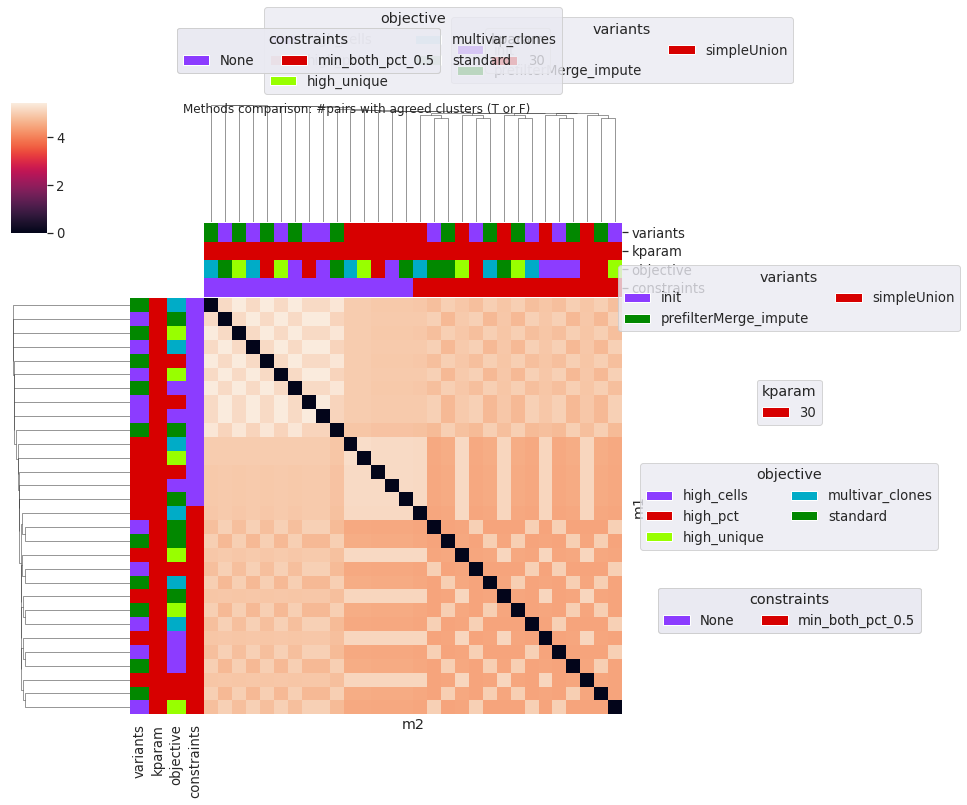

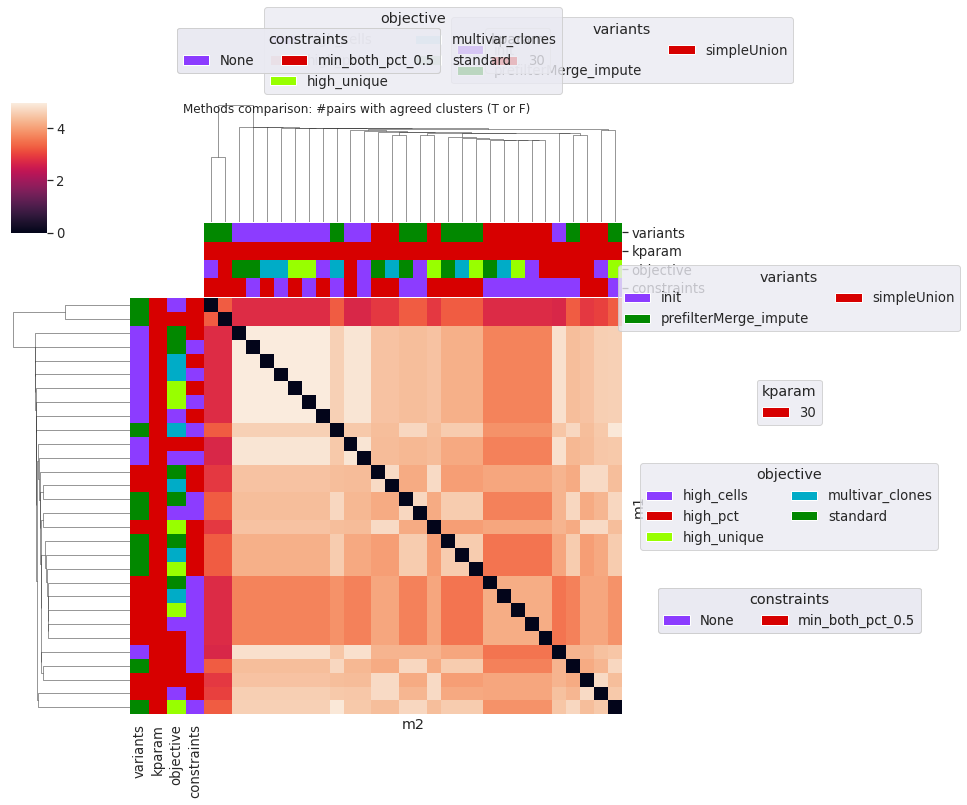

In [18]:
donors_heatmap_meta(meth_df, metric="n_agree", meta_df=meta_params, out_f=join(outdir, "methods_nAgree"),
               title="Methods comparison: #pairs with agreed clusters (T or F)")
#plt.savefig(join(outdir, "methods_nAgree.png"))


# donors_heatmap(meth_df, metric="n_agree", 
#                title="Methods comparison: #pairs with agreed clusters (T or F)")
# plt.savefig(join(outdir, "methods_nAgree.png"))

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


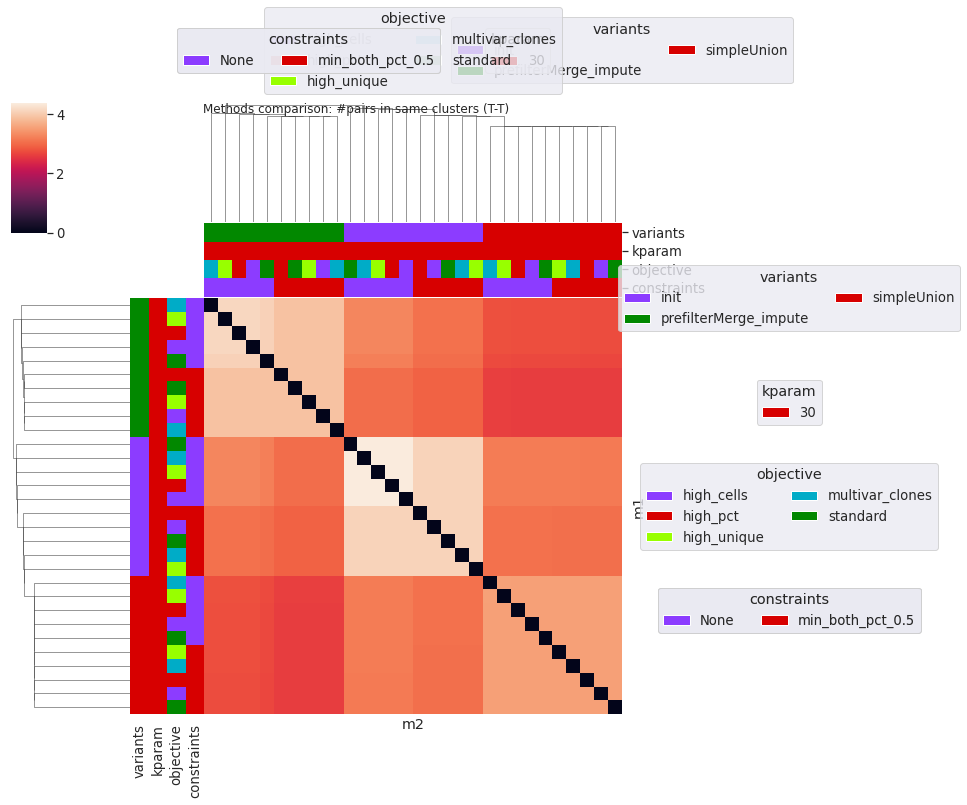

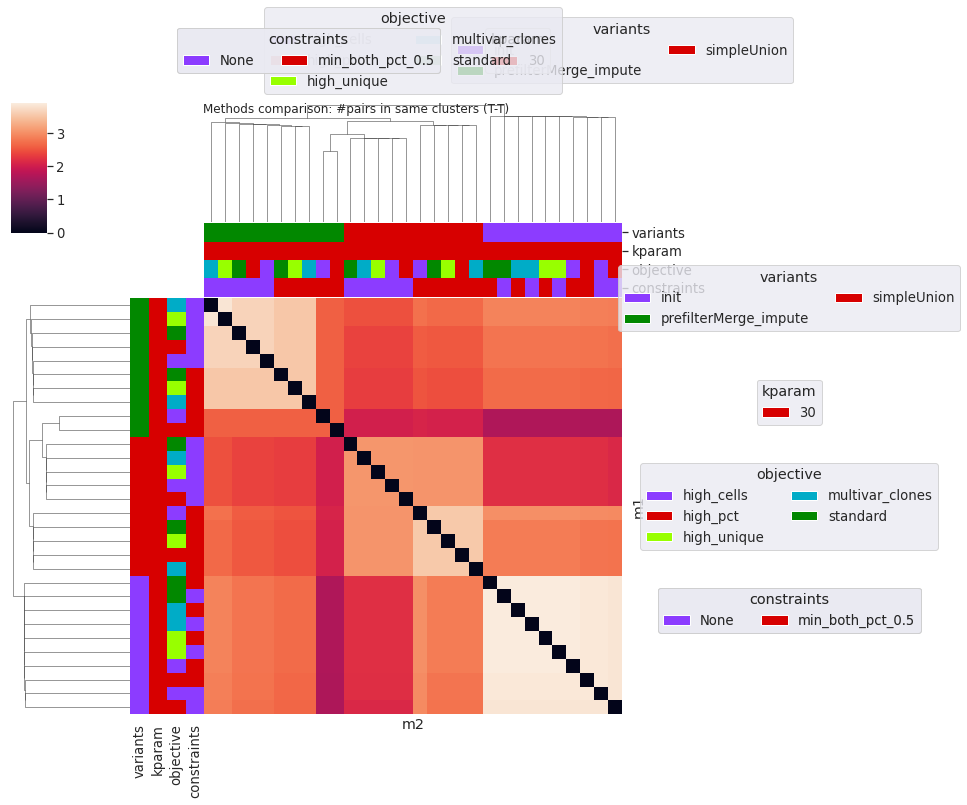

In [19]:
donors_heatmap_meta(meth_df, metric="n_T_T", meta_df=meta_params, out_f=join(outdir, "methods_nTT"),
               title="Methods comparison: #pairs in same clusters (T-T)")

# donors_heatmap(meth_df, metric="n_T_T", 
#                title="Methods comparison: #pairs in same clusters (T-T)")
# plt.savefig(join(outdir, "methods_nTT.png"))
# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_T_T"]).astype('float'))
#     plt.title(f"Methods comparison: #pairs in shared clusters clusters\n donor {d}")

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


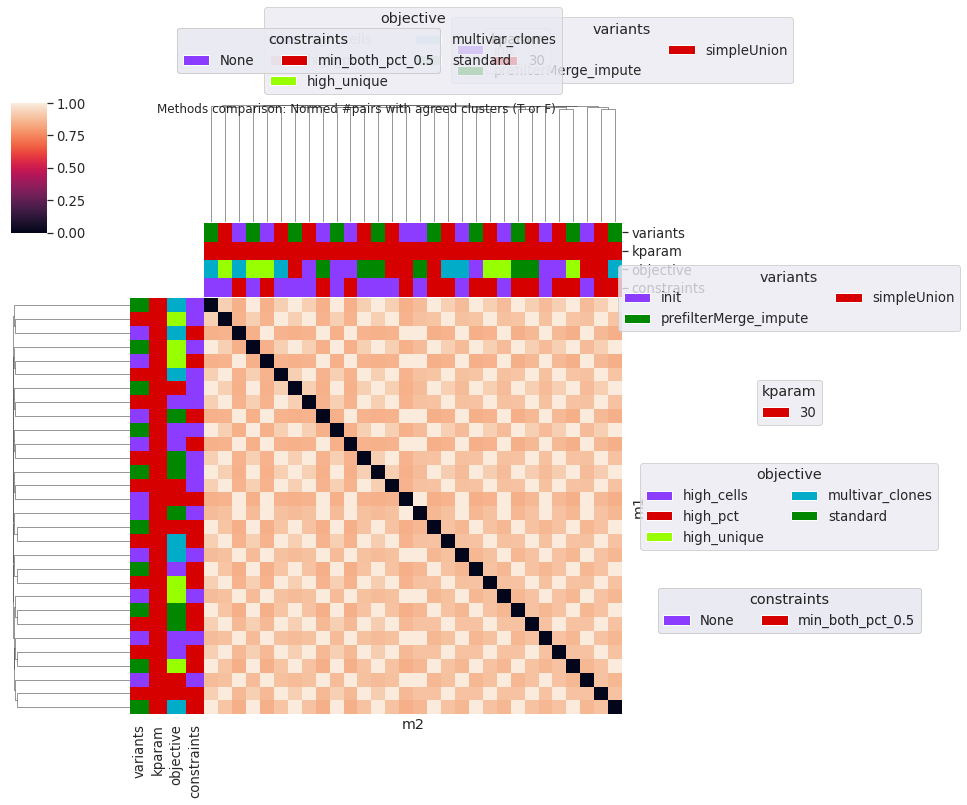

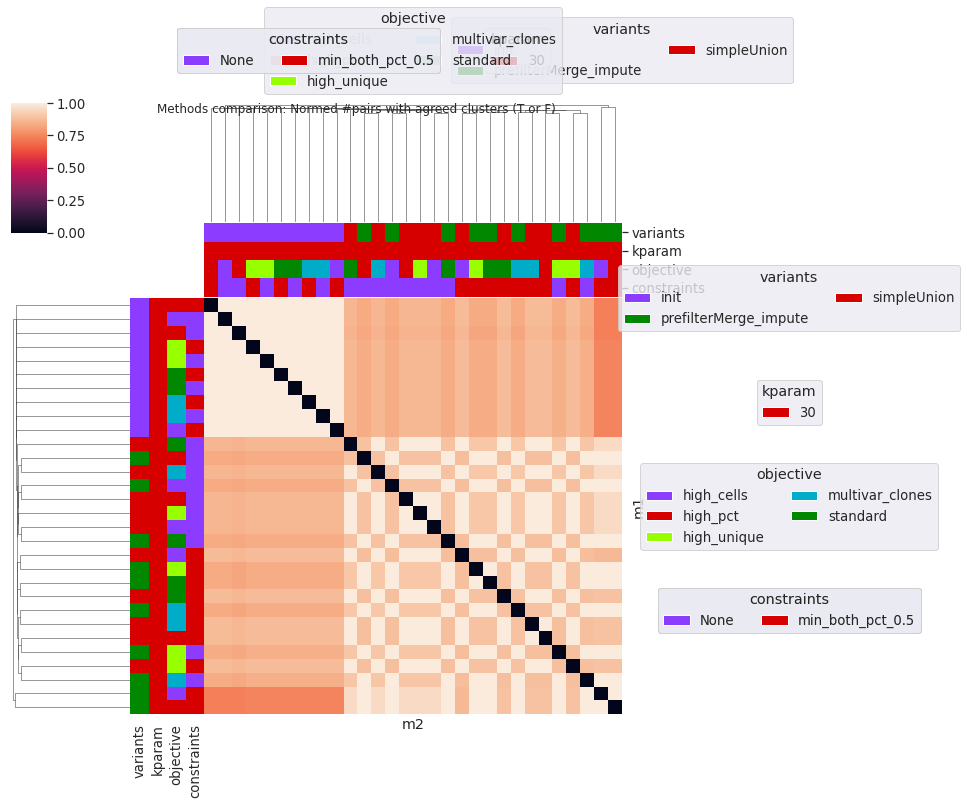

In [20]:
donors_heatmap_meta(meth_df, metric="n_agree_norm", meta_df=meta_params, out_f=join(outdir, "methods_nAgreeNorm"),
               title="Methods comparison: Normed #pairs with agreed clusters (T or F)", to_log=False)
plt.savefig(join(outdir, "methods_nAgreeNorm.png"))

# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_agree_norm"]).astype('float'))
#     plt.title(f"Methods comparison: Normed #pairs with agreed clusters (T or F)\n donor {d}")

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


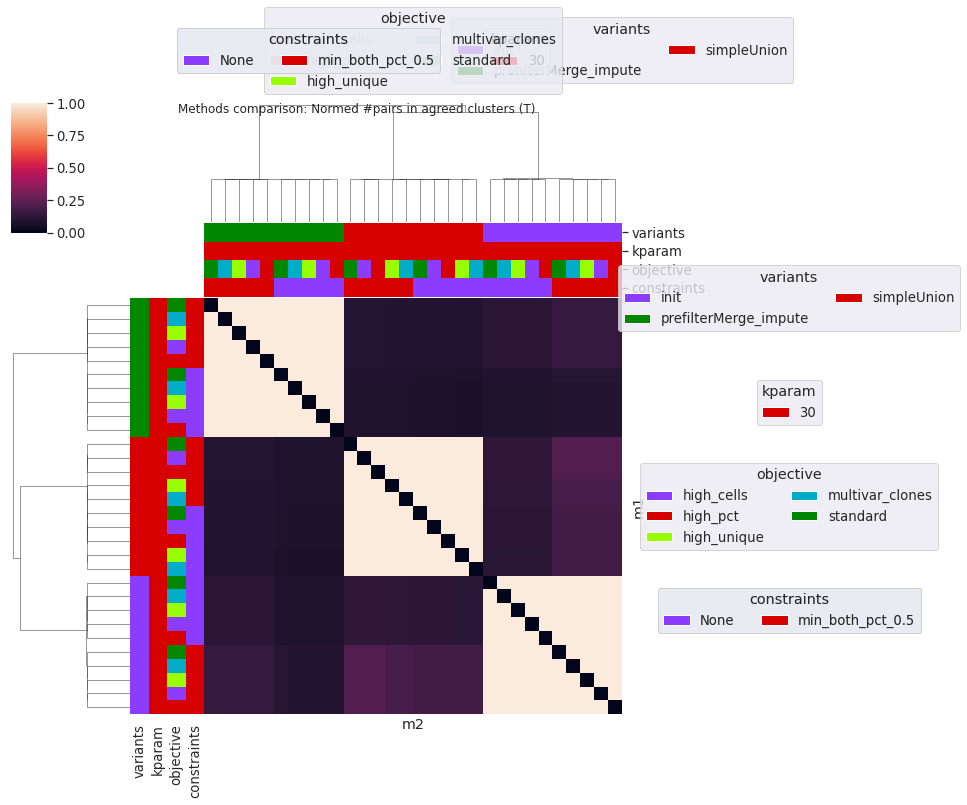

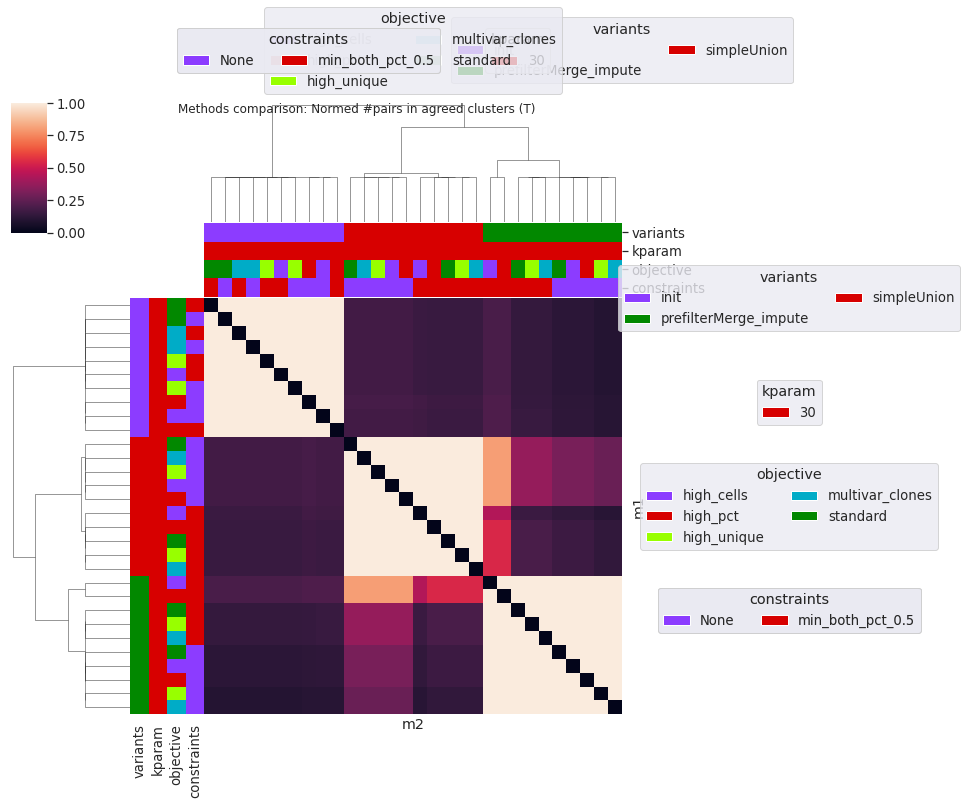

In [21]:
donors_heatmap_meta(meth_df, metric="n_T_T_norm", title="Methods comparison: Normed #pairs in agreed clusters (T)",
                   meta_df=meta_params, out_f=join(outdir, "methods_nTTNorm"),to_log=False)
#plt.savefig(join(outdir, "methods_nTTNorm.png"))


In [22]:
meta_params.to_csv(join(outdir, "methods_comparisons.csv"))

#params_files.to_csv(join(outdir, "params_files.csv"))

## Donors aggregate

In [23]:
#df[metric] = np.log10(df[metric]+1)
# df_agg = meth_df.groupby(['m1','m2']).mean()
# df_agg.reset_index()

m2                                                  /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv  \
m1                                                                                                                                                                                                                                                                                                                                     
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MT...                                           0.000000                                                                                                                                                                                                                                  
/data/Mito_Trace

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


m2                                                  /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv  \
m1                                                                                                                                                                                                                                                                                                                                     
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MT...                                           0.000000                                                                                                                                                                                                                                  
/data/Mito_Trace

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


m2                                                  /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv  \
m1                                                                                                                                                                                                                                                                                                                                     
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MT...                                           0.000000                                                                                                                                                                                                                                  
/data/Mito_Trace

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


m2                                                  /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_cells_constraints_None/clones/variants_init/knn/kparam_30/cells_meta.tsv  \
m1                                                                                                                                                                                                                                                                                                                                     
/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MT...                                           0.000000                                                                                                                                                                                                                                  
/data/Mito_Trace

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


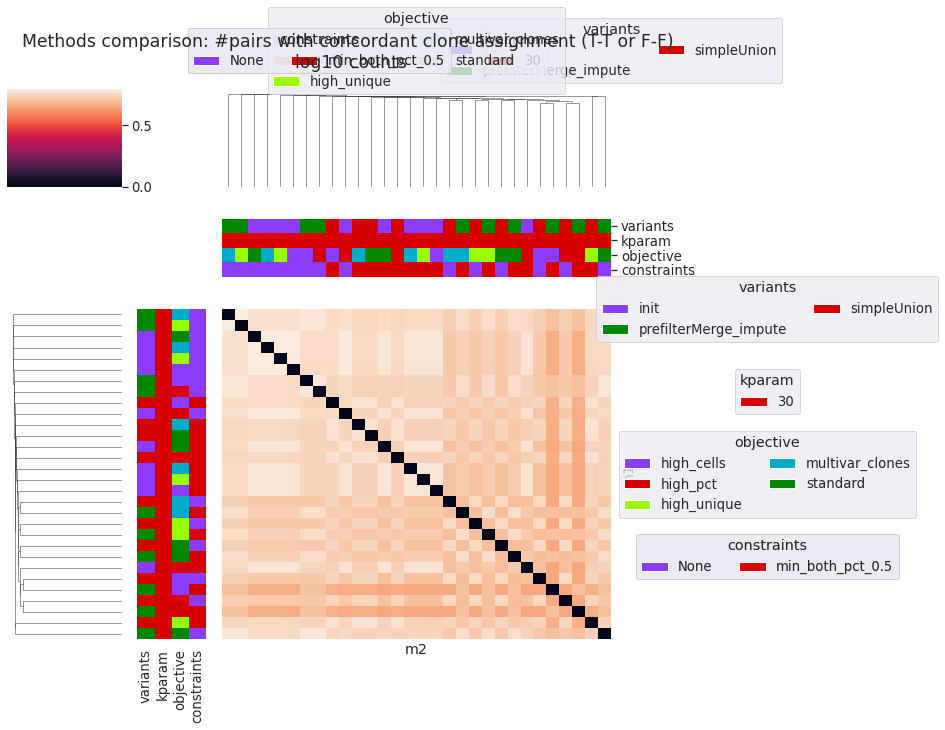

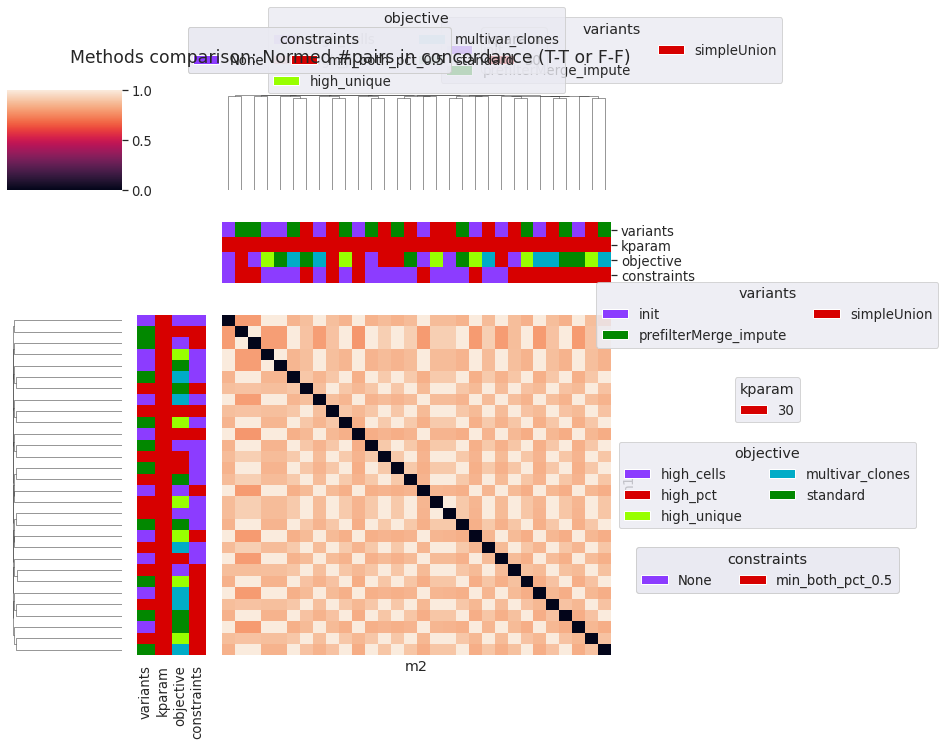

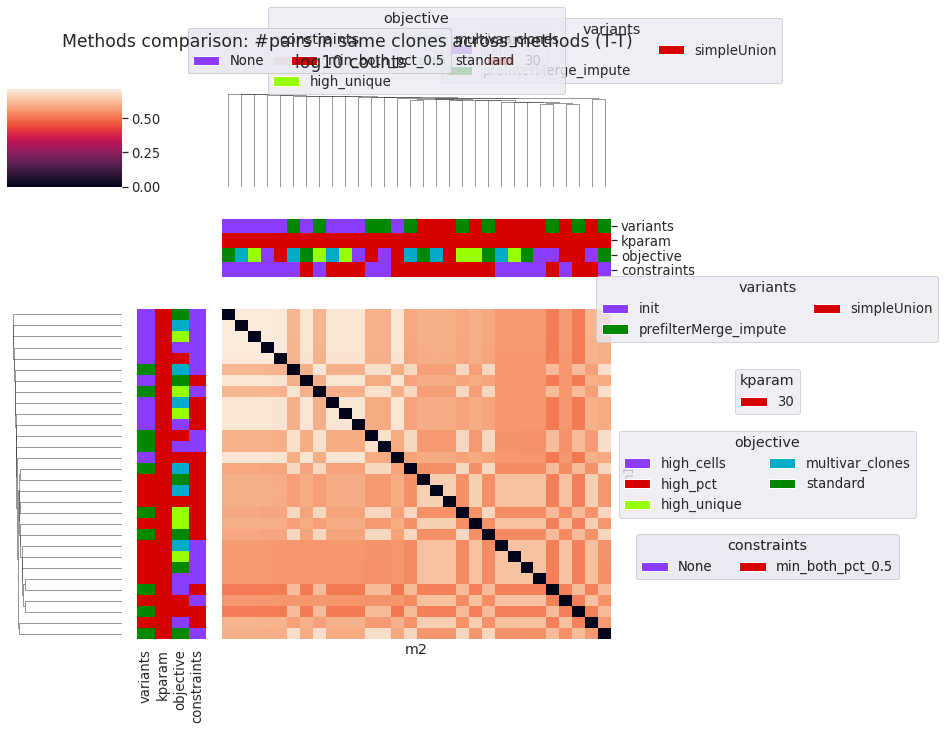

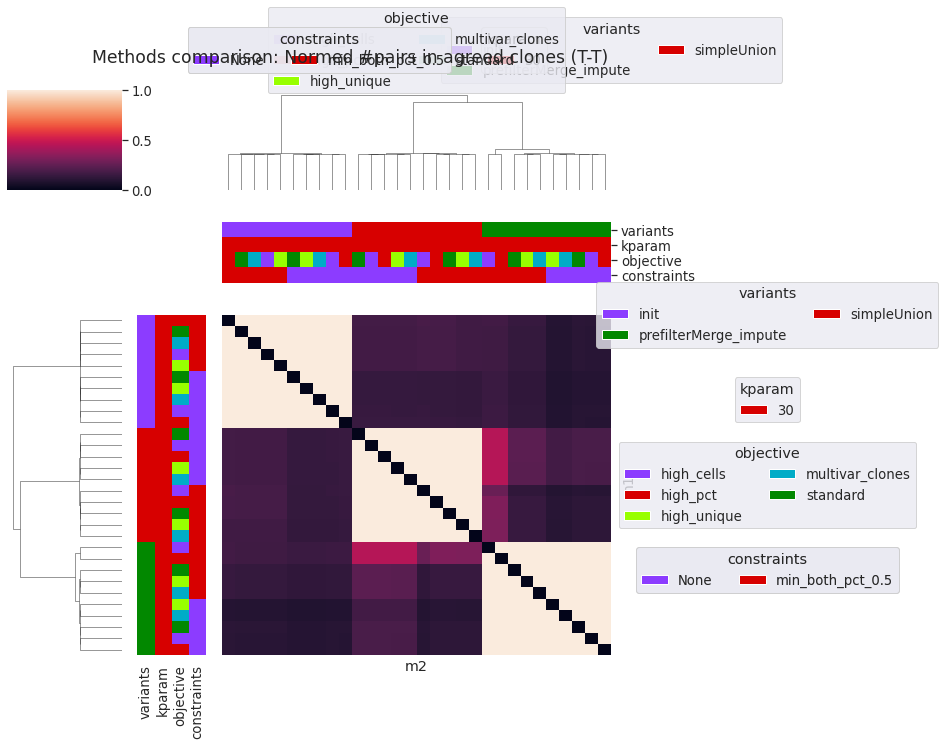

In [33]:
donors_agg_heatmap(meth_df, metric="n_agree", to_log=True, meta_df=meta_params,
               title="Methods comparison: #pairs with concordant clone assignment (T-T or F-F) \nlog10 counts")
plt.savefig(join(outdir, "methods_nAgree_agg.png"))

donors_agg_heatmap(meth_df, metric="n_agree_norm", meta_df=meta_params, to_log=False,
                   title="Methods comparison: Normed #pairs in concordance (T-T or F-F)")
plt.savefig(join(outdir, "methods_nAgreeNorm_agg.png"))

donors_agg_heatmap(meth_df, metric="n_T_T", to_log=True, meta_df=meta_params,
               title="Methods comparison: #pairs in same clones across methods (T-T) \nlog10 counts")
plt.savefig(join(outdir, "methods_n_T_T_agg.png"))

donors_agg_heatmap(meth_df, metric="n_T_T_norm", meta_df=meta_params, to_log=False,
                   title="Methods comparison: Normed #pairs in agreed clones (T-T)")
plt.savefig(join(outdir, "methods_nTTNorm_agg.png"))


